# Obtain stock prices

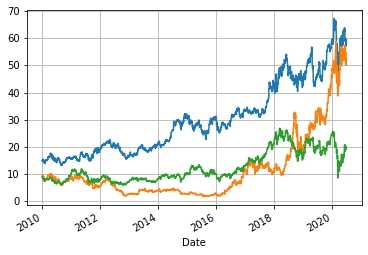

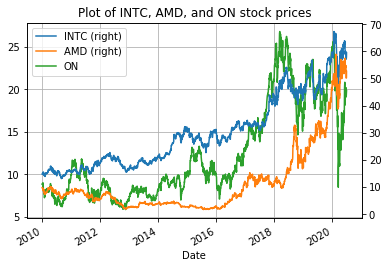

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

# Specify the starting and ending dates for the time series
start = datetime(2010, 1, 1)
end  = datetime(2020, 6, 30)

#Selected stocks
selected = ['INTC','AMD','ON']

# The first argument is the series we want, second is the source (“yahoo” for  Yahoo! Finance)
intc = web.DataReader('INTC', 'yahoo', start, end)
amd = web.DataReader('AMD', 'yahoo', start, end)
on = web.DataReader('ON', 'yahoo', start, end)

# Select only the adjusted closing price data and convert the data into a DataFrame
stocks = pd.DataFrame({'INTC': intc['Adj Close'],
                       'AMD': amd['Adj Close'],
                       'ON': on['Adj Close']})

# Print the DataFrame
#print(stocks)


# Plot the respective graphs
intc['Adj Close'].plot(grid=True)
amd['Adj Close'].plot(grid=True)
on['Adj Close'].plot(grid=True);

# Include a secondary axis for better visualization
stocks.plot(secondary_y = ['AMD', 'INTC'], title='Plot of INTC, AMD, and ON stock prices', grid=True);

# Descriptive Statistic

In [2]:
import scipy
from scipy.stats import skew, kurtosis

# Presenting the summary statistics, rounding to 4 d.p.
stats = round(stocks.describe(), 4)
print(stats)

            INTC        AMD         ON
count  2642.0000  2642.0000  2642.0000
mean     29.9364    11.3813    12.3516
std      13.2692    12.1806     5.5082
min      13.0390     1.6200     5.8200
25%      18.6619     3.6900     8.1000
50%      27.8293     7.1100     9.9450
75%      40.6256    12.7475    16.1350
max      67.2947    58.9000    26.8000


In [3]:
# Presenting the mean and std dev
aggregate = round(stocks.aggregate([np.mean, np.std]), 4)
print(aggregate)

         INTC      AMD       ON
mean  29.9364  11.3813  12.3516
std   13.2692  12.1806   5.5082


In [4]:
# Print the skewness and kurtosis of the stocks
skewness = round(stocks.skew(), 4)
print('Skewness of the stocks:')
print(skewness)
print('\n')

kurtosis = round(stocks.kurtosis(), 4)
print('Kurtosis of the stocks: ')
print(kurtosis)

Skewness of the stocks:
INTC    0.7717
AMD     2.0116
ON      0.9191
dtype: float64


Kurtosis of the stocks: 
INTC   -0.4833
AMD     3.5340
ON     -0.4686
dtype: float64


# Compute daily and monthly returns

In [5]:
# Computing percentage change (simple returns) and round to 4 d.p.
daily_return = stocks.pct_change()
monthly_return = stocks.resample('M').ffill().pct_change()

# Presenting the mean and std dev of daily and monthly returns
daily_stats = round(daily_return.aggregate([np.mean, np.std]), 4)
print(daily_stats)

        INTC     AMD      ON
mean  0.0007  0.0013  0.0007
std   0.0176  0.0364  0.0268


In [6]:
monthly_stats = round(monthly_return.aggregate([np.mean, np.std]), 4)
print(monthly_stats)

        INTC     AMD      ON
mean  0.0131  0.0259  0.0124
std   0.0639  0.1582  0.1087


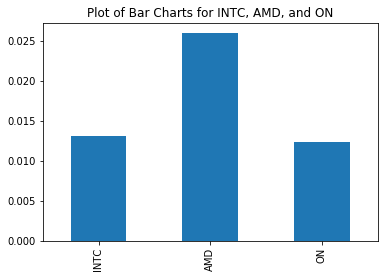

In [7]:
# Plotting Bar Chart for monthly returns all 3 stocks
monthly_return.mean().plot(kind='bar', title='Plot of Bar Charts for INTC, AMD, and ON')

# Compute log return

In [8]:
# Computing log return
log_return=np.log(stocks/stocks.shift(1))

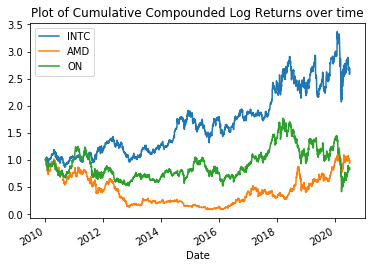

In [9]:
# Plotting the cumulative log returns (cum_return) over time; use the cumprod() method to compute            
log_return = log_return.replace(np.nan, 0)
cum_comp_log_return = (1 + log_return).cumprod()

# Plotting the cumulative returns of all stocks
cum_comp_log_return.plot(title = 'Plot of Cumulative Compounded Log Returns over time')
plt.show()

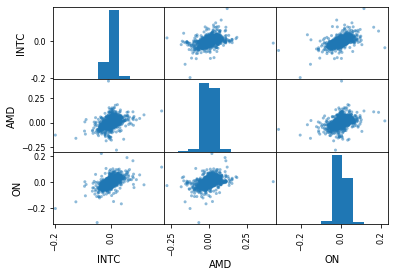

In [10]:
# Plotting the histogram and scatter plot
pd.plotting.scatter_matrix(log_return, diagonal='hist');

In [11]:
#Compute Correlation

In [12]:
# Compute and print the correlation matrix, and round up to 4 decimal places
correl=round(log_return.corr(),4)
print('The correlation matrix of the 3 stocks:')
print(correl)

The correlation matrix of the 3 stocks:
        INTC     AMD      ON
INTC  1.0000  0.4215  0.5620
AMD   0.4215  1.0000  0.4249
ON    0.5620  0.4249  1.0000


# Compute annual returns, std dev, variance-covariance matrix, and correlation

In [13]:
# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(annual_returns)
print('\n')
      
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev')
print(annual_std_dev)
print('\n')
      
# Computing variance-covariance matrix with cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252

print('Variance-Covariance Matrix:')
print(cov_matrix)
print('\n')

# Compute and print Correlation matrix
corr = daily_simple_returns.corr()
print('Correlation Matrix:')
print(corr)

Annual Return:
INTC    0.172124
AMD     0.325742
ON      0.168409
dtype: float64


Annual Std Dev
INTC    0.279135
AMD     0.578062
ON      0.425527
dtype: float64


Variance-Covariance Matrix:
          INTC       AMD        ON
INTC  0.077916  0.066566  0.066235
AMD   0.066566  0.334155  0.102686
ON    0.066235  0.102686  0.181073


Correlation Matrix:
          INTC       AMD        ON
INTC  1.000000  0.412541  0.557632
AMD   0.412541  1.000000  0.417455
ON    0.557632  0.417455  1.000000


Text(0.5, 1, "Correlation Matrix Heatmap of Each Stock's Daily % Change in Adj Close Price")

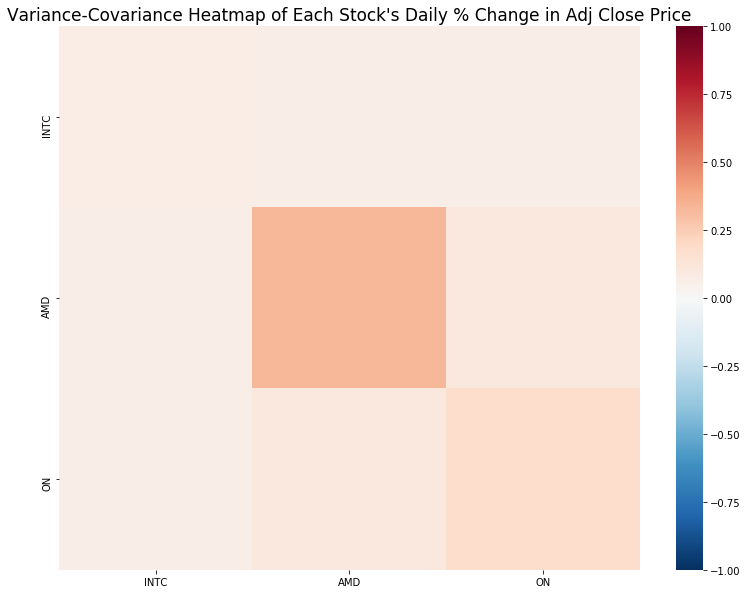

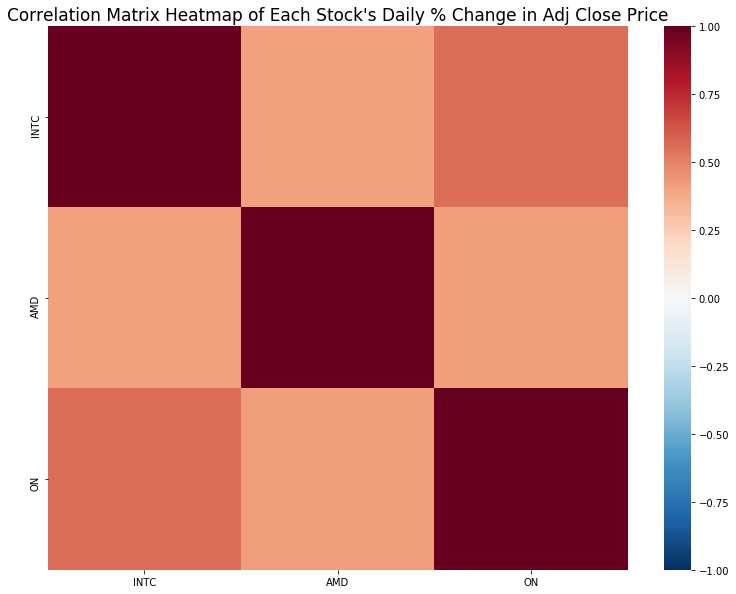

In [14]:
# Taking a look at the correlation between every single stock's daily price

import seaborn as sn

plt.figure(figsize=(13,10))
sn.heatmap(cov_matrix, 
        xticklabels=cov_matrix.columns,
        yticklabels=cov_matrix.columns,
        cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Variance-Covariance Heatmap of Each Stock's Daily % Change in Adj Close Price", fontsize = 17)

plt.figure(figsize=(13,10))
sn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap of Each Stock's Daily % Change in Adj Close Price", fontsize = 17)

In [15]:
# Create empty lists to store returns, volatility and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

# set the number of combinations (1,000) for imaginary portfolios
num_assets = len(stocks.columns) #number of assest
num_portfolios = 1000
rf = 0.00

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)

    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)
    
    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
    # Printing the weights of each stock and the corresponding expected annual return and risk of portfolio 
    print('Weight in INTC, AMD and ON:', weights)
    print('Expected annual return of portfolio:', returns)
    print('Annual volatility of portfolio:', std)

Weight in INTC, AMD and ON: [0.57504117 0.09082473 0.3341341 ]
Expected annual return of portfolio: 0.1848349253196769
Annual volatility of portfolio: 0.29559427182803444
Weight in INTC, AMD and ON: [0.34435106 0.50133077 0.15431818]
Expected annual return of portfolio: 0.24856391796283112
Annual volatility of portfolio: 0.37874320792826477
Weight in INTC, AMD and ON: [0.29320748 0.31111251 0.39568001]
Expected annual return of portfolio: 0.21844648712463877
Annual volatility of portfolio: 0.3466780447095601
Weight in INTC, AMD and ON: [0.65978846 0.1064807  0.23373084]
Expected annual return of portfolio: 0.1876128892685547
Annual volatility of portfolio: 0.2872147911223476
Weight in INTC, AMD and ON: [0.47618816 0.50711016 0.01670168]
Expected annual return of portfolio: 0.24996288333754332
Annual volatility of portfolio: 0.37227925492714653
Weight in INTC, AMD and ON: [0.33008291 0.28748794 0.38242915]
Expected annual return of portfolio: 0.21486654557358406
Annual volatility of por

Weight in INTC, AMD and ON: [0.22946963 0.40061325 0.36991712]
Expected annual return of portfolio: 0.23229110007276707
Annual volatility of portfolio: 0.3693612549070832
Weight in INTC, AMD and ON: [0.56275983 0.06494236 0.37229781]
Expected annual return of portfolio: 0.18071717722243014
Annual volatility of portfolio: 0.29794037030510306
Weight in INTC, AMD and ON: [0.38568375 0.48955551 0.12476074]
Expected annual return of portfolio: 0.24686481168247681
Annual volatility of portfolio: 0.3722215485416933
Weight in INTC, AMD and ON: [0.30633039 0.25449034 0.43917927]
Expected annual return of portfolio: 0.20958673548749313
Annual volatility of portfolio: 0.33916458984663317
Weight in INTC, AMD and ON: [0.41163149 0.38444654 0.20392197]
Expected annual return of portfolio: 0.2304241576758567
Annual volatility of portfolio: 0.34410506114286105
Weight in INTC, AMD and ON: [0.34154747 0.37707363 0.2813789 ]
Expected annual return of portfolio: 0.22900384785555586
Annual volatility of po

Expected annual return of portfolio: 0.24510139345572352
Annual volatility of portfolio: 0.4151039225105543
Weight in INTC, AMD and ON: [0.49501807 0.30351454 0.20146739]
Expected annual return of portfolio: 0.21800066465379378
Annual volatility of portfolio: 0.3209315854829288
Weight in INTC, AMD and ON: [0.20028143 0.43743128 0.3622873 ]
Expected annual return of portfolio: 0.23797535034243156
Annual volatility of portfolio: 0.3803328780198804
Weight in INTC, AMD and ON: [0.37598083 0.41770428 0.20631489]
Expected annual return of portfolio: 0.23552425518577028
Annual volatility of portfolio: 0.3548338002454575
Weight in INTC, AMD and ON: [0.32293953 0.40167351 0.27538696]
Expected annual return of portfolio: 0.23280508790915116
Annual volatility of portfolio: 0.3571261644128095
Weight in INTC, AMD and ON: [0.55746054 0.35231215 0.0902273 ]
Expected annual return of portfolio: 0.22591003251407665
Annual volatility of portfolio: 0.32634771045446986
Weight in INTC, AMD and ON: [0.04991

Weight in INTC, AMD and ON: [0.12298499 0.60754224 0.26947278]
Expected annual return of portfolio: 0.26445219102134176
Annual volatility of portfolio: 0.4308443843702792
Weight in INTC, AMD and ON: [0.51053403 0.30238195 0.18708402]
Expected annual return of portfolio: 0.2178801026404743
Annual volatility of portfolio: 0.3194099475815716
Weight in INTC, AMD and ON: [0.23725083 0.33516131 0.42758786]
Expected annual return of portfolio: 0.222022300747678
Annual volatility of portfolio: 0.3584483518070996
Weight in INTC, AMD and ON: [0.47482621 0.24767499 0.27749879]
Expected annual return of portfolio: 0.20914030404230816
Annual volatility of portfolio: 0.31501634820810154
Weight in INTC, AMD and ON: [0.31472216 0.37876078 0.30651706]
Expected annual return of portfolio: 0.22916965427483743
Annual volatility of portfolio: 0.35377937209603155
Weight in INTC, AMD and ON: [0.39765799 0.1653058  0.43703621]
Expected annual return of portfolio: 0.19589434734356317
Annual volatility of portf

Weight in INTC, AMD and ON: [0.04566751 0.46155733 0.49277516]
Expected annual return of portfolio: 0.241196875621302
Annual volatility of portfolio: 0.4096544229831156
Weight in INTC, AMD and ON: [0.44371673 0.12776439 0.42851888]
Expected annual return of portfolio: 0.1901589475737721
Annual volatility of portfolio: 0.31308914612939653
Weight in INTC, AMD and ON: [0.23884509 0.6543782  0.10677671]
Expected annual return of portfolio: 0.2722513369448624
Annual volatility of portfolio: 0.4337447030642462
Weight in INTC, AMD and ON: [0.78611834 0.18248552 0.03139613]
Expected annual return of portfolio: 0.20004012607823868
Annual volatility of portfolio: 0.2881000889875691
Weight in INTC, AMD and ON: [0.07175315 0.47749268 0.45075417]
Expected annual return of portfolio: 0.2438009105941426
Annual volatility of portfolio: 0.4079547159357888
Weight in INTC, AMD and ON: [0.33268609 0.41270199 0.25461192]
Expected annual return of portfolio: 0.23457642427499986
Annual volatility of portfoli

Weight in INTC, AMD and ON: [0.22009693 0.35184015 0.42806292]
Expected annual return of portfolio: 0.22458270579223302
Annual volatility of portfolio: 0.36337434166815125
Weight in INTC, AMD and ON: [0.5924871 0.3634103 0.0441026]
Expected annual return of portfolio: 0.22778622817553562
Annual volatility of portfolio: 0.3274957623881373
Weight in INTC, AMD and ON: [0.46442033 0.21521977 0.3203599 ]
Expected annual return of portfolio: 0.20399539943701822
Annual volatility of portfolio: 0.3131181998128565
Weight in INTC, AMD and ON: [0.31270257 0.31211242 0.37518501]
Expected annual return of portfolio: 0.21867621522850317
Annual volatility of portfolio: 0.3438648381807845
Weight in INTC, AMD and ON: [0.43259717 0.44944742 0.11795541]
Expected annual return of portfolio: 0.24072876435879956
Annual volatility of portfolio: 0.3579570473450428
Weight in INTC, AMD and ON: [0.32869999 0.19956627 0.47173374]
Expected annual return of portfolio: 0.2010284941720353
Annual volatility of portfol

Weight in INTC, AMD and ON: [0.29899676 0.24088655 0.4601167 ]
Expected annual return of portfolio: 0.20741918078796034
Annual volatility of portfolio: 0.339508069630501
Weight in INTC, AMD and ON: [0.15635826 0.19599449 0.64764725]
Expected annual return of portfolio: 0.19982641126863304
Annual volatility of portfolio: 0.3664084150015662
Weight in INTC, AMD and ON: [0.18720981 0.24822215 0.56456804]
Expected annual return of portfolio: 0.20815809814176056
Annual volatility of portfolio: 0.3605585507184469
Weight in INTC, AMD and ON: [0.27278461 0.58224766 0.14496773]
Expected annual return of portfolio: 0.26102893680566136
Annual volatility of portfolio: 0.40817227781127885
Weight in INTC, AMD and ON: [0.48223584 0.11350398 0.40426018]
Expected annual return of portfolio: 0.18805839651436074
Annual volatility of portfolio: 0.30749331892715137
Weight in INTC, AMD and ON: [0.69458885 0.28713315 0.018278  ]
Expected annual return of portfolio: 0.21616460718803537
Annual volatility of por

# Create a nice DataFrame for Returns, Risks, Sharpe Ratio, and weights in each stock

In [16]:
# A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
#   print(counter, symbol)

# Make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]
print(df)

      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  ON weight
0    0.184835    0.295594      0.625299     0.575041    0.090825   0.334134
1    0.248564    0.378743      0.656286     0.344351    0.501331   0.154318
2    0.218446    0.346678      0.630113     0.293207    0.311113   0.395680
3    0.187613    0.287215      0.653215     0.659788    0.106481   0.233731
4    0.249963    0.372279      0.671439     0.476188    0.507110   0.016702
..        ...         ...           ...          ...         ...        ...
995  0.227239    0.342782      0.662927     0.385797    0.364814   0.249390
996  0.236296    0.359092      0.658037     0.346304    0.423310   0.230386
997  0.201263    0.332022      0.606174     0.332351    0.200971   0.466677
998  0.187158    0.286801      0.652572     0.664176    0.103486   0.232338
999  0.224366    0.353082      0.635450     0.284086    0.348951   0.366963

[1000 rows x 6 columns]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


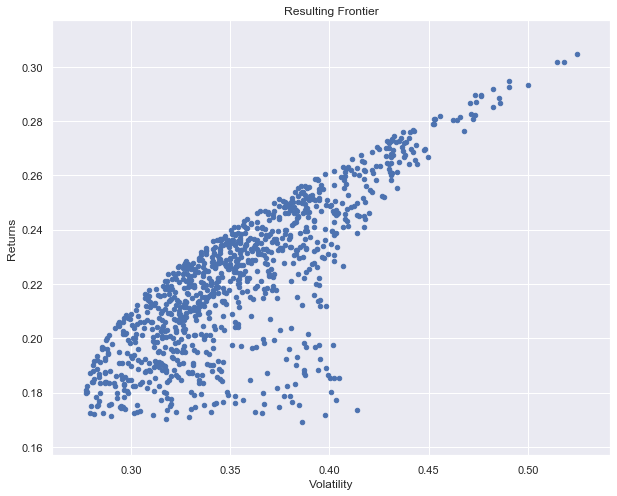

In [17]:
# Plot the resulting frontier with a scatter plot
import seaborn as sns
sns.set()

df.plot.scatter(x = 'Volatility', y = 'Returns', figsize=(10, 8))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Resulting Frontier')
plt.show();

In [18]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

print('Minimum Variance Portfolio:')
print(min_variance_port)
print('\n')
print('Optimal Portfolio:')
print(sharpe_portfolio)

Minimum Variance Portfolio:
     Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  ON weight
42  0.179981    0.277278        0.6491     0.856003    0.053341   0.090656


Optimal Portfolio:
     Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  ON weight
68  0.217662    0.309398        0.7035     0.700257    0.296514   0.003229


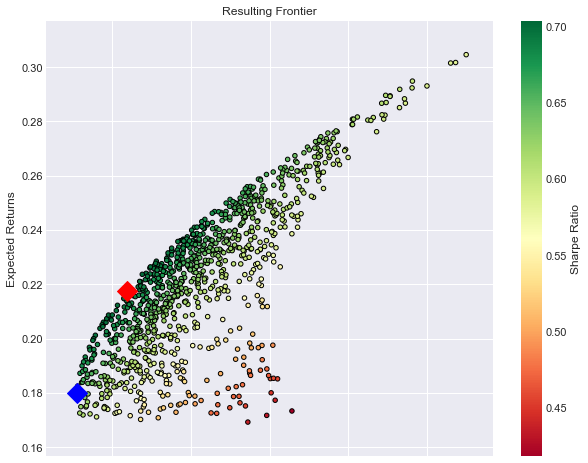

In [19]:
# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
                cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier')
plt.show();

In [20]:
# Print the details of the 2 special portfolios
print('Minimum Variance Portfolio:')
print(min_variance_port.T)
print('\n')
print('Optimal Portfolio:')
print(sharpe_portfolio.T)

Minimum Variance Portfolio:
                    42
Returns       0.179981
Volatility    0.277278
Sharpe Ratio  0.649100
INTC weight   0.856003
AMD weight    0.053341
ON weight     0.090656


Optimal Portfolio:
                    68
Returns       0.217662
Volatility    0.309398
Sharpe Ratio  0.703500
INTC weight   0.700257
AMD weight    0.296514
ON weight     0.003229


Date
2009-12-31    0.050
2010-01-04    0.055
2010-01-05    0.060
2010-01-06    0.045
2010-01-07    0.045
              ...  
2020-06-24    0.135
2020-06-25    0.130
2020-06-26    0.133
2020-06-29    0.125
2020-06-30    0.135
Name: Adj Close, Length: 2620, dtype: float64


0.0013500000536441803

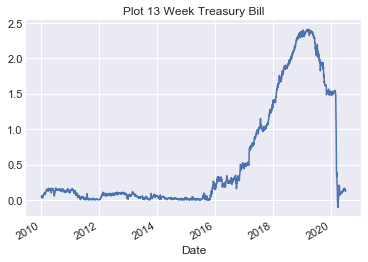

In [21]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

# Specify the starting and ending dates for the time series
start = datetime(2010, 1, 1)
end  = datetime(2020, 6, 30)
#end  = datetime.today()

# The first argument is the series we want, second is the source (“yahoo” for  Yahoo! Finance)
t_bills = web.DataReader('^IRX', 'yahoo', start, end)


# Select only the adjusted closing price data and convert the data into a DataFrame
stocks = pd.DataFrame({'^IRX': t_bills['Adj Close']})

# Print the DataFrame
# print(stocks)

# Plot the t-bill graph
t_bills['Adj Close'].plot(title='Plot 13 Week Treasury Bill', grid=True);


print(t_bills['Adj Close'])

#locate last price
S0 = (t_bills['Adj Close'].iloc[-1])/100  #Consider to use annual return
S0


In [22]:
import scipy
from scipy.stats import skew, kurtosis

# Presenting the summary statistics, rounding to 4 d.p.
stats = round(stocks.describe(), 4)
print(stats)

            ^IRX
count  2620.0000
mean      0.5547
std       0.7693
min      -0.1050
25%       0.0350
50%       0.1250
75%       0.9935
max       2.4080


# Get Risk Aversion Score from excel

In [23]:
import xlrd

workbook = xlrd.open_workbook('Risk aversion input.xlsx')
worksheet = workbook.sheet_by_name('Sheet1')
num_rows = worksheet.nrows - 1
curr_row = 0
while curr_row < num_rows:
        curr_row += 1
        row = worksheet.row(curr_row)
A_excel = (row[0].value)
print(A_excel)
        

10.0


In [24]:
# Empty lists to store weight in the risky portfolio
# as well as returns, volatility, utility value for the complete portfolios
port_returns = []
port_volatility = []
port_utility = []
riskyport_weights = []

# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000
exp_ret_p = float(sharpe_portfolio['Returns']) #0.22602853458313316 #sharpe_portfolio['Returns'].iloc[0]
std_dev_p = float(sharpe_portfolio['Volatility']) # 0.3233037450445219 #sharpe_portfolio['Volatility'].iloc[0]
rf = S0
A = A_excel

# We start with 0% investment in risky portfolio
weight_p = 0.00 

In [25]:
# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    utility = round(returns - 0.5*A*std_dev*std_dev, 4)

# We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    port_returns.append(returns)
    port_volatility.append(std_dev)
    port_utility.append(utility)
    riskyport_weights.append(weight_p)

In [26]:
# A dictionary for weight in risky portfolio, returns, risk, and Utility values of each complete portfolio
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility': port_utility}

# Make a nice dataframe 
df = pd.DataFrame(portfolio)

print(df)

     Weight_Risky  Returns  Volatility  Utility
0           0.001   0.0014      0.0000   0.0014
1           0.002   0.0016      0.0003   0.0016
2           0.003   0.0018      0.0006   0.0018
3           0.004   0.0020      0.0009   0.0020
4           0.005   0.0022      0.0012   0.0022
..            ...      ...         ...      ...
995         0.996   0.2166      0.3079  -0.2574
996         0.997   0.2168      0.3082  -0.2581
997         0.998   0.2170      0.3085  -0.2589
998         0.999   0.2172      0.3088  -0.2596
999         1.000   0.2174      0.3091  -0.2603

[1000 rows x 4 columns]


# Capital Allocation Line

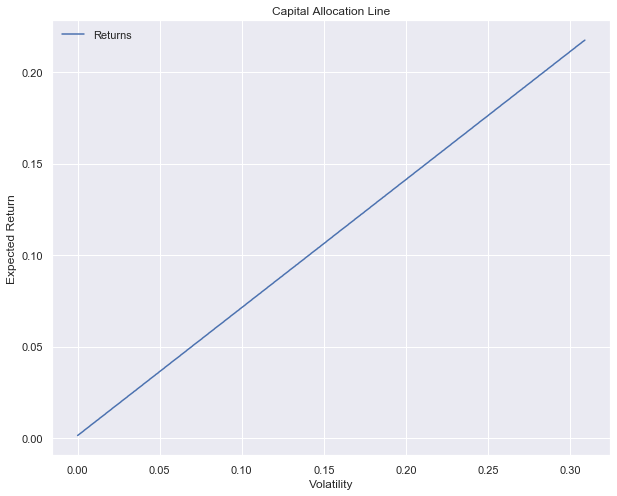

In [27]:
import seaborn as sns
sns.set()


df.plot.line(x = 'Volatility', y = 'Returns', figsize=(10, 8))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Capital Allocation Line')
plt.show();

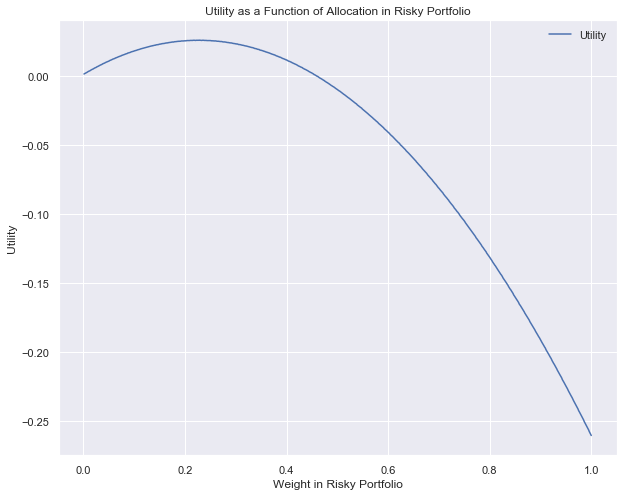

In [28]:
# Plot the Utility Function
sns.set()

df.plot.line(x='Weight_Risky', y='Utility', figsize=(10, 8))
plt.xlabel('Weight in Risky Portfolio')
plt.ylabel('Utility')
plt.title('Utility as a Function of Allocation in Risky Portfolio')
plt.show();

# Finding Maximum Utility Value & Optimal Weight in Risky Portfolio

In [29]:
# Use max() to obtain the maximum utility value and round up to 3 d.p.
util_max = round(max(port_utility), 4)

risk_premium = exp_ret_p - rf

# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky = round(risk_premium/(A*std_dev_p*std_dev_p), 3)
optimal_exp_return = round(optimal_weight_risky*exp_ret_p + (1-optimal_weight_risky)*rf, 3)
optimal_std_dev = round(optimal_weight_risky*std_dev_p, 3)
sharpe_ratio = round(risk_premium/std_dev_p, 3)

print('Maximum value of Utility =', util_max)
print('Optimal weight in risky portfolio =', optimal_weight_risky)
print('Expected return of complete portfolio =', optimal_exp_return)
print('Risk of optimal complete portfolio =', optimal_std_dev)
print('Sharpe Ratio of complete portfolio =', sharpe_ratio)

Maximum value of Utility = 0.0259
Optimal weight in risky portfolio = 0.226
Expected return of complete portfolio = 0.05
Risk of optimal complete portfolio = 0.07
Sharpe Ratio of complete portfolio = 0.699


# Plotting the Indifference Curve

In [30]:
# List of expected return and std dev for the indifference curve
exp_return_curve = []
std_dev_curve = []
num_portfolios = 11
std_dev = 0

# For loop to iterate through number of complete portfolios required
for single_portfolio in range(num_portfolios):
    exp_return = round(util_max + 0.5*A*std_dev*std_dev, 3)
    exp_return_curve.append(exp_return)
    std_dev_curve.append(std_dev)
    std_dev = round(std_dev + 0.02, 3)

# A dictionary for expected return and volatility
curve = {'Returns': exp_return_curve,
         'Volatility': std_dev_curve}

# Make a nice dataframe 
df1 = pd.DataFrame(curve)

print(df1)

    Returns  Volatility
0     0.026        0.00
1     0.028        0.02
2     0.034        0.04
3     0.044        0.06
4     0.058        0.08
5     0.076        0.10
6     0.098        0.12
7     0.124        0.14
8     0.154        0.16
9     0.188        0.18
10    0.226        0.20


# Plotting the Indifference Curve & CAL together

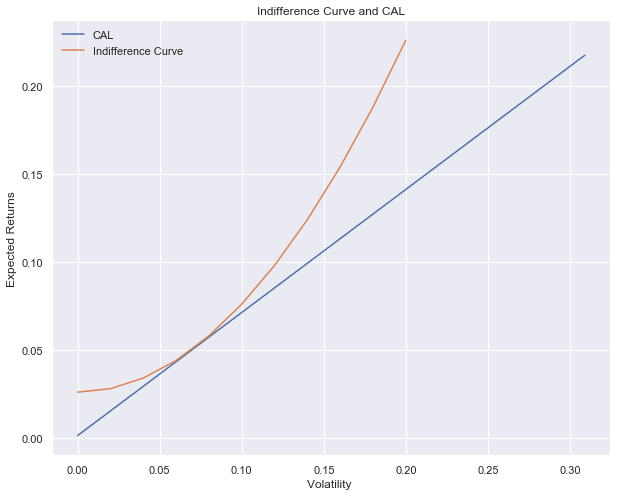

In [31]:
# Plotting the two curves togetherax = df.plot(x='Volatility', y='Returns', label='CAL', figsize = (10,8))
ax1 = df.plot(x='Volatility', y='Returns', label='CAL', figsize = (10,8))
df1.plot(ax=ax1, x='Volatility', y='Returns', label='Indifference Curve')
plt.xlabel('Volatility ')
plt.ylabel('Expected Returns')
plt.title('Indifference Curve and CAL')
plt.legend()
plt.show()


# Adding in S&P 500 Index to portfolio

Date
2009-12-31    1115.099976
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
                 ...     
2020-06-24    3050.330078
2020-06-25    3083.760010
2020-06-26    3009.050049
2020-06-29    3053.239990
2020-06-30    3100.290039
Name: Adj Close, Length: 2642, dtype: float64
           ^GSPC
count  2642.0000
mean   2011.0519
std     618.1644
min    1022.5800
25%    1402.9875
50%    2020.1100
75%    2548.5375
max    3386.1499


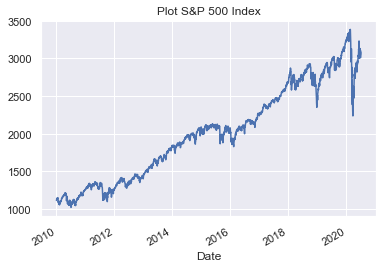

In [32]:

# Specify the starting and ending dates for the time series
start = datetime(2010, 1, 1)
#end  = datetime.today()
end  = datetime(2020, 6, 30)

# The first argument is the series we want, second is the source (“yahoo” for  Yahoo! Finance)
snp = web.DataReader('^GSPC', 'yahoo', start, end)


# Select only the adjusted closing price data and convert the data into a DataFrame
stocks = pd.DataFrame({'^GSPC': snp['Adj Close']})

# Print the DataFrame
# print(stocks)

# Plot the t-bill graph
snp['Adj Close'].plot(title='Plot S&P 500 Index', grid=True);

print(snp['Adj Close'])

# Presenting the summary statistics, rounding to 4 d.p.
stats = round(stocks.describe(), 4)
print(stats)

In [33]:
#To show each stock's annualised return and std_dev on resulting frontier?

In [ ]:
#Obtain Risk Appetite Score from google form 

# Google Sheet API

In [4]:
from gsheets import Sheets
sheets = Sheets.from_files('~/client_secrets.json', '~/storage.json') #C:\\Users\\Gavin Ng/client_secrets.json
url = 'https://docs.google.com/spreadsheets/d/1aI-LFrN-P4iSlnhp1o6PJj03LoxkzdYiXevGSmeZ73I'
s = sheets.get(url)
s.find('Form Responses 1')
s[96677403].at(row=1, col=1)  #to point to calculated cell in googlesheet.

'More than 15 years: 100% Risky assets'